### 1. 패키지 불러오기

In [384]:
import warnings # 경고창 무시
warnings.filterwarnings("ignore")
import time

from lightgbm import LGBMClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 데이터 시각화
import seaborn as sns # 통계적 데이터 시각화

from sklearn.datasets import make_classification

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV



In [385]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [386]:
from lightgbm import LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

In [1068]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [1206]:
train=pd.read_csv("C:/Users/SAMSUNG/Desktop/비어플/팀프로젝트 - 심리 성향 예측/open data/train_f.csv",index_col=[0])
test=pd.read_csv("C:/Users/SAMSUNG/Desktop/비어플/팀프로젝트 - 심리 성향 예측/open data/test_f.csv",index_col=[0])
submission=pd.read_csv("C:/Users/SAMSUNG/Desktop/비어플/팀프로젝트 - 심리 성향 예측/open data/sample_submission.csv",index_col=[0])

In [1207]:
print(train.dtypes)

age_group       int64
education       int64
engnat          int64
familysize      int64
gender          int64
married         int64
race            int64
religion        int64
urban           int64
voted           int64
wr_mean       float64
Mach_score    float64
Op            float64
Co            float64
Ne            float64
dtype: object


In [1208]:
print(test.dtypes)

age_group       int64
education       int64
engnat          int64
familysize      int64
gender          int64
married         int64
race            int64
religion        int64
urban           int64
wr_mean       float64
Mach_score    float64
Op            float64
Co            float64
Ne            float64
dtype: object


In [1209]:
train['education']=train['education'].astype('category')
train['age_group']=train['age_group'].astype('category')
train['race']=train['race'].astype('category')
train['religion']=train['religion'].astype('category')
train['urban']=train['urban'].astype('category')
train['voted']=train['voted'].astype('category')
train['engnat']=train['engnat'].astype('category')
train['gender']=train['gender'].astype('category')
train['married']=train['married'].astype('category')
#train['hand']=train['hand'].astype('category')


test['education']=test['education'].astype('category')
test['age_group']=test['age_group'].astype('category')
test['race']=test['race'].astype('category')
test['religion']=test['religion'].astype('category')
test['urban']=test['urban'].astype('category')
test['engnat']=test['engnat'].astype('category')
test['engnat']=test['engnat'].astype('category')
test['gender']=test['gender'].astype('category')
test['married']=test['married'].astype('category')
#test['hand']=test['hand'].astype('category')


In [1210]:
print(train.dtypes)

age_group     category
education     category
engnat        category
familysize       int64
gender        category
married       category
race          category
religion      category
urban         category
voted         category
wr_mean        float64
Mach_score     float64
Op             float64
Co             float64
Ne             float64
dtype: object


In [1211]:
print(test.dtypes)

age_group     category
education     category
engnat        category
familysize       int64
gender        category
married       category
race          category
religion      category
urban         category
wr_mean        float64
Mach_score     float64
Op             float64
Co             float64
Ne             float64
dtype: object


In [1212]:
X_train = train.drop(['voted'],axis=1)
y_train = train['voted']

In [1213]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1234)

### 3. LGBM 모델 생성

In [1214]:
#파라미터 적용
model = lgb.LGBMClassifier(boosting_type='gbdt',
                          num_leaves=30,
                          max_depth=7,
                          learning_rate=0.05,
                          n_estimators=120,
                          subsample_for_bin=200000,
                          objective='binary', #default=None
                          metric='binary_logloss',
                          min_split_gain=0,
                          min_child_weight=1e-3,
                          min_child_samples=20,
                          subsample=1,
                          subsample_freq=0,
                          colsample_bytree=1,
                          reg_alpha=0,
                          reg_lambda=0,
                          random_state=None,
                          silent=True,
                          importance_type='split')

In [1215]:
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=80, verbose=True,eval_metric='auc')


[1]	valid_0's auc: 0.819889	valid_0's binary_logloss: 0.655909
Training until validation scores don't improve for 80 rounds
[2]	valid_0's auc: 0.820329	valid_0's binary_logloss: 0.640869
[3]	valid_0's auc: 0.821522	valid_0's binary_logloss: 0.627065
[4]	valid_0's auc: 0.821578	valid_0's binary_logloss: 0.614561
[5]	valid_0's auc: 0.821299	valid_0's binary_logloss: 0.603079
[6]	valid_0's auc: 0.82165	valid_0's binary_logloss: 0.59254
[7]	valid_0's auc: 0.821476	valid_0's binary_logloss: 0.582848
[8]	valid_0's auc: 0.821683	valid_0's binary_logloss: 0.573944
[9]	valid_0's auc: 0.822007	valid_0's binary_logloss: 0.565774
[10]	valid_0's auc: 0.822434	valid_0's binary_logloss: 0.558124
[11]	valid_0's auc: 0.822304	valid_0's binary_logloss: 0.551096
[12]	valid_0's auc: 0.822524	valid_0's binary_logloss: 0.544601
[13]	valid_0's auc: 0.822654	valid_0's binary_logloss: 0.538601
[14]	valid_0's auc: 0.82283	valid_0's binary_logloss: 0.533
[15]	valid_0's auc: 0.823197	valid_0's binary_logloss: 0.5

LGBMClassifier(colsample_bytree=1, learning_rate=0.05, max_depth=7,
               metric='binary_logloss', min_split_gain=0, n_estimators=120,
               num_leaves=30, objective='binary', reg_alpha=0, reg_lambda=0,
               subsample=1)

+ 정확도, 과적합 확인

In [1216]:
y_pred=model.predict(X_valid)
accuracy=accuracy_score(y_pred, y_valid)
# 정확도 확인
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_valid, y_pred)))
# 과적합 확인
print('Train set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_valid, y_valid)))

LightGBM Model accuracy score: 0.7407
Train set score: 0.7554
Test set score: 0.7407


In [1217]:
print('정확도(accuracy) : {0:0.4f}'.format(accuracy_score(y_valid, y_pred)))
print('Train set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_valid, y_valid)))
print('정밀도(precision) : {0:0.4f}'.format(precision_score(y_valid, y_pred)))
print('재현율(recall) : {0:0.4f}'.format(recall_score(y_valid, y_pred)))
print('F1 점수 : {0:0.4f}'.format(f1_score(y_valid, y_pred)))
print('Roc_Auc score: {0:0.4f}'.format(roc_auc_score(y_valid, y_pred)))

정확도(accuracy) : 0.7407
Train set score: 0.7554
Test set score: 0.7407
정밀도(precision) : 0.6317
재현율(recall) : 0.8377
F1 점수 : 0.7203
Roc_Auc score: 0.7570


+ 오차 행렬 (Confusion matrix)

In [1080]:
cm = confusion_matrix(y_valid, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['예측 : 1', '예측 : 2'], 
                                 index=['실제 : 1', '실제 : 2'])

cm_matrix

,예측 : 1,예측 : 2
실제 : 1,2962,636
실제 : 2,1723,3706


+ 분류 리포트  
<br>
+ 정확도: 정확히 예측한 수를 전체 샘플 수로 나눈 것
<br>
+ 정밀도(precision): 양성으로 예측된 것 중 얼마나 많은 샘플이 진짜 양성인지를 측정
+ 재현율(recall): 전체 양성 샘플 중에서 얼마나 많은 샘플이 양성 클래스로 분류되는지를 측정
+ f1-점수(f1-score): 정밀도와 재현율의 조화 평균으로, 이 둘을 하나로 요약  
<br> 
+ 분류 리포트의 마지막 세 줄은 정밀도, 재현율, f1-점수의 평균
    + macro avg는 단순히 클래스별 점수의 평균
    + weighted avg는 클래스의 샘플 수로 가중평균

In [1081]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.82      0.72      3598
           2       0.85      0.68      0.76      5429

    accuracy                           0.74      9027
   macro avg       0.74      0.75      0.74      9027
weighted avg       0.77      0.74      0.74      9027



In [1082]:
preds=model.predict(X_valid)
preds

array([1, 1, 1, ..., 2, 2, 1], dtype=int64)

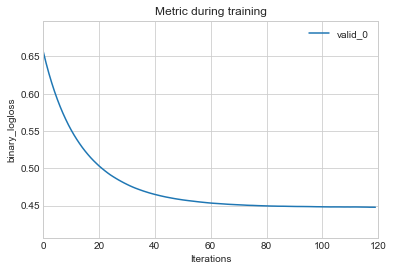

In [1116]:
plot_metric(model)

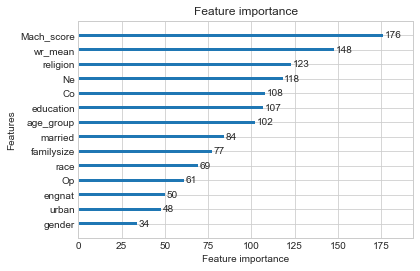

In [1118]:
plot_importance(model)

In [1122]:
model.fit(train_x, train_y)

LGBMClassifier(colsample_bytree=1, learning_rate=0.05, max_depth=7,
               metric='binary_logloss', min_split_gain=0, n_estimators=120,
               num_leaves=30, objective='binary', reg_alpha=0, reg_lambda=0,
               subsample=1)

In [1124]:
pred_lgb = model.predict(test)

In [1125]:
pred_lgb

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [944]:
submission['voted']=pred_

In [945]:
submission

,index,voted
0,0,2
1,1,2
2,2,1
3,3,1
4,4,2
...,...,...
11378,11378,2
11379,11379,2
11380,11380,2
11381,11381,2


In [948]:
submission.to_csv('C:/Users/SAMSUNG/Desktop/비어플/팀프로젝트 - 심리 성향 예측/open data/submission.csv')